### Steps to build a Neural Network

1. Empty Model (sequential/Model)
2

In [3]:
import tensorflow.keras.datasets as kd

In [4]:
data = kd.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [5]:
(xtrain,ytrain),(xtest,ytest) = data

In [6]:
xtrain.shape

(60000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

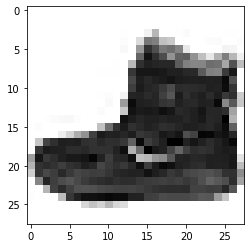

In [8]:
plt.imshow(xtrain[0,:,:],cmap='gray_r')

In [9]:
ytrain[0]

9

In [11]:
xtrain1 = xtrain.reshape(-1,28*28)
xtest1 = xtest.reshape(-1,28*28)

In [12]:
xtrain1.shape

(60000, 784)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model_ann = Sequential()
model_ann.add(Dense(units=128, input_shape=(784,), activation='relu'))
model_ann.add(Dense(units=128, activation='relu'))
model_ann.add(Dense(units=10, activation='softmax'))
model_ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
1st layer = 

SyntaxError: invalid syntax (<ipython-input-18-d08b3109403e>, line 1)

In [19]:
history = model_ann.fit(xtrain1,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.0255 - accuracy: 0.7341
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6520 - accuracy: 0.7857
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6020 - accuracy: 0.8008
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5439 - accuracy: 0.8156
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5079 - accuracy: 0.8259
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4657 - accuracy: 0.8365
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4380 - accuracy: 0.8442
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4248 - accuracy: 0.8483
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4050 - accuracy: 0.8524
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.399

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.grid()
plt.
plt.xticks(range(1,11))
plt.xlabel('Epochs-->')
plt.show()

SyntaxError: invalid syntax (<ipython-input-20-3297b100e545>, line 4)

In [21]:
ypred = model_ann.predict(xtest1)

In [22]:
labels.get(ytest[0])

NameError: name 'labels' is not defined

In [24]:
ypred[0].argmax()

9

In [25]:
model_ann.evaluate(xtest1,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.4793 - accuracy: 0.8335


[0.4792548716068268, 0.8335000276565552]

### Churn Modelling

In [26]:
import pandas as pd

In [28]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [30]:
df1 = pd.get_dummies(df)

In [31]:
df1.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,0,0,0,0,0,1,0,0,1,0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,0,0,0,0,0,0,0,1,1,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,0,0,0,0,0,1,0,0,1,0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,0,0,0,0,0,1,0,0,1,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,0,0,0,0,0,0,0,1,1,0


### Recurrent Neural Network

In [39]:
import numpy as np

In [32]:
stock_data = pd.read_csv('stock_data.csv')

In [34]:
fb = stock_data[['Open']] [stock_data['Stock']=='FB'].copy()

In [36]:
fb.head()

,Open
18205,42.05
18206,36.53
18207,32.61
18208,31.37
18209,32.95


In [37]:
fb = fb.values

In [38]:
fb.shape

(1381, 1)

In [ ]:
x = []
y = []
for i in range(20, len(fb)):
    x.append(fb['Open'].valuesfb[i-20:1].tolist())
    y.append(fb[i].tolist())
